In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [57]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # use this for hi-dpi displays
sns.set_style('whitegrid')  # set the plotting style

# Random walk

The random walk is a stochastic (i.e. random) procress used to describe a trajectory built of successive steps with equal probability in any direction. 

## Random walk in 1D

Starting at the origin, $y=0$, we initiate a 
random walk process, where steps in either direction are equally probably. 

Plotting the cumulative sum shows the trajectory. 


In [59]:
# Define parameters for the walk
dims = 1
n = 1000000
step_set = [-1, 0, 1]

In [60]:
# define size and number of steps 
step_shape = (n, dims)

# define origin at y = 0
origin = np.zeros((1, dims))
step_shape, origin

((1000000, 1), array([[0.]]))

In [61]:
# Simulate steps in 1D with either -1, 0, or 1 step size 
np.random.seed(0)
steps = np.random.choice(a=step_set, size=step_shape)
steps

array([[-1],
       [ 0],
       [-1],
       ...,
       [ 1],
       [ 0],
       [-1]])

In [62]:
# calculate cumulative steps from origin (along the 0th axis)
path = np.concatenate([origin, steps]).cumsum(0)
path

array([[ 0.000e+00],
       [-1.000e+00],
       [-1.000e+00],
       ...,
       [-1.246e+03],
       [-1.246e+03],
       [-1.247e+03]])

In [63]:
# define the first and last steps 
start = path[:1]
stop = path[-1:]
start, stop

(array([[0.]]), array([[-1247.]]))

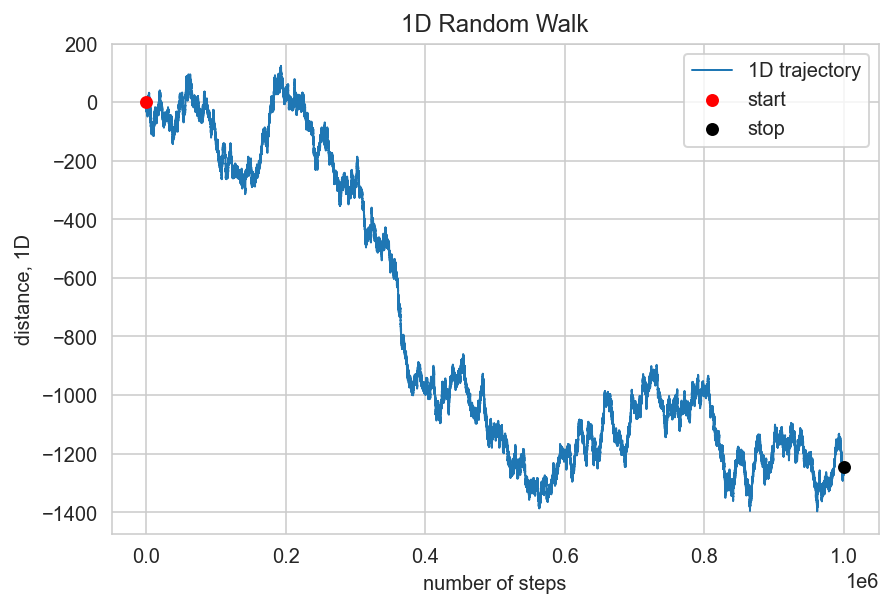

In [64]:
# Plot the path
plt.plot(path, lw=1, ls='-', label = '1D trajectory', zorder=1);
plt.scatter(0, start, color='r', s=30, label = 'start', zorder=2)
plt.scatter(n, stop, color='k', s=30, label = 'stop', zorder=3)
plt.ylabel('distance, 1D')
plt.xlabel('number of steps')
plt.title('1D Random Walk')
plt.legend()
plt.tight_layout(pad=0);

In [65]:
num_paths = np.arange(1, 100)

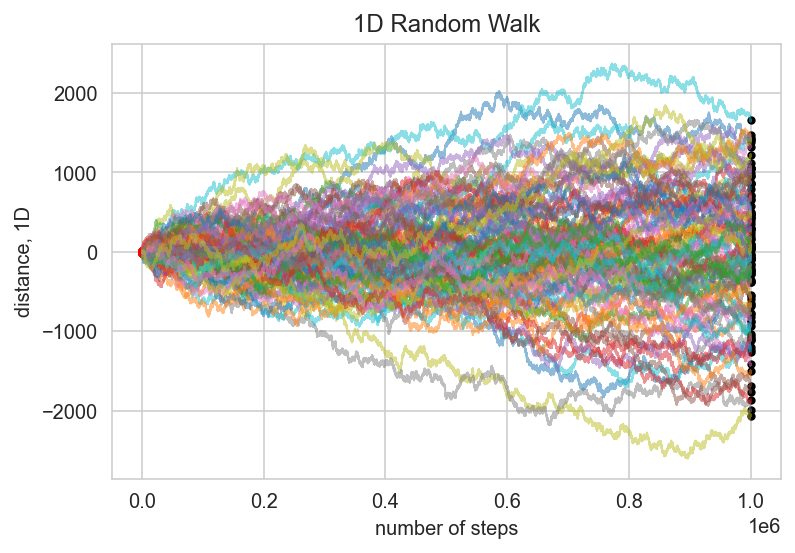

In [66]:
paths_1d = []

for i in num_paths:
  # Simulate steps in 1D    
    origin = np.random.randint(low=-10,high=10,size=(1,dims))
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    paths_1d.append(path)
    start = path[:1]
    stop = path[-1:] 
  # plot trajectories
    plt.plot(path, alpha=0.5, lw=1, ls='-');
    plt.scatter(0, start, color='r', s=10)
    plt.scatter(n, stop, color='k', s=10)
    plt.ylabel('distance, 1D')
    plt.xlabel('number of steps')
    plt.title('1D Random Walk');

In [11]:
paths_1d = np.asarray(paths_1d).ravel()

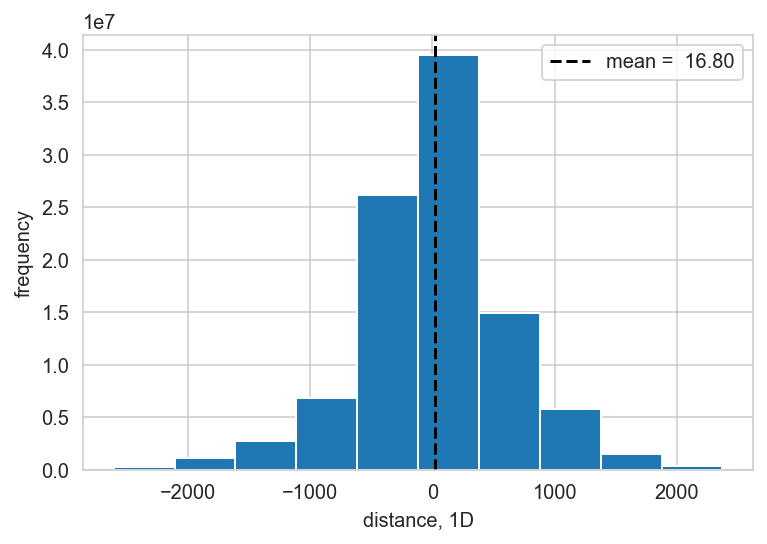

In [12]:
plt.hist(paths_1d.ravel())
plt.axvline(paths_1d.ravel().mean(), color='k', linestyle='--', label=f'mean = {paths_1d.ravel().mean(): .2f}')
plt.xlabel('distance, 1D')
plt.ylabel('frequency')
plt.legend();

## Random walk in 2D

Starting at the origin, $(x=0, y=0)$, and taking random steps in either $x$ or $y$ dimensions with step size of -1, 0, or 1. 

I.e. 9 possible $(\Delta x, \Delta y)$: 

    (-1,-1), (-1,0), (-1,1),
    (0,-1), (0,0), (0,1),
    (1,-1), (1,0), (1,1)

In [13]:
# Define parameters for the walk
dims = 2
n = 10000
step_set = [-1, 0, 1]

In [14]:
# define size and number of steps 
step_shape = (n, dims)

# define origin at y = 0
origin = np.zeros((1, dims))
step_shape, origin

((10000, 2), array([[0., 0.]]))

In [15]:
# Simulate steps in 1D with either -1, 0, or 1 step size 
steps = np.random.choice(a=step_set, size=step_shape)
steps

array([[ 0, -1],
       [ 1,  1],
       [-1,  0],
       ...,
       [ 0,  0],
       [-1,  1],
       [-1, -1]])

In [20]:
# calculate cumulative steps from origin 
path = np.concatenate([origin, steps]).cumsum(0)
path

array([[   0.,    0.],
       [   0.,   -1.],
       [   1.,    0.],
       ...,
       [ -97., -227.],
       [ -98., -226.],
       [ -99., -227.]])

In [21]:
# define the first and last steps 
start = path[:1]
stop = path[-1:]
start, stop

(array([[0., 0.]]), array([[ -99., -227.]]))

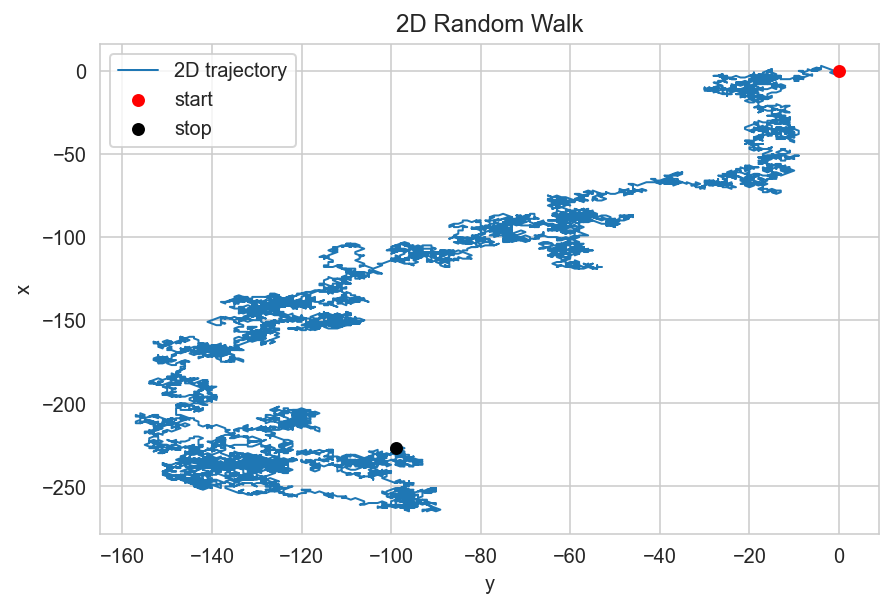

In [22]:
# Plot the path
#plt.scatter(path[:,0], path[:,1], color = 'darkblue', alpha=0.25, s=0.05);
plt.plot(path[:,0], path[:,1], lw=1, ls='-', label = '2D trajectory', zorder = 1);
plt.scatter(start[:,0], start[:,1], color='r', s=30, label = 'start', zorder = 2)
plt.scatter(stop[:,0], stop[:,1], color='k', s=30, label = 'stop', zorder = 3)
plt.ylabel('x')
plt.xlabel('y')
plt.title('2D Random Walk')
plt.legend()
plt.tight_layout(pad=0);

In [23]:
num_paths = np.arange(1, 100)

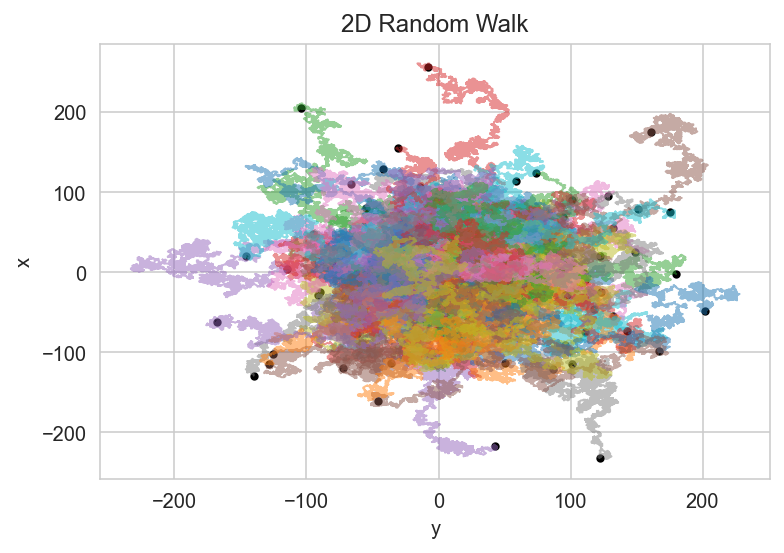

In [24]:
paths_2d_x = []
paths_2d_y = []

for i in num_paths:
  # Simulate steps in 3D    
    origin = np.random.randint(low=-10,high=10,size=(1,dims))
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    paths_2d_x.append(path[:,0])
    paths_2d_y.append(path[:,1])
    start = path[:1]
    stop = path[-1:] 
  # plot trajectories
    #plt.scatter(path[:,0], path[:,1], color = 'darkblue', alpha=0.25, s=0.05);
    plt.plot(path[:,0], path[:,1], alpha=0.5, lw=1, ls='-');
    plt.scatter(start[:,0], start[:,1], color='r', s=10)
    plt.scatter(stop[:,0], stop[:,1], color='k', s=10)
    plt.ylabel('x')
    plt.xlabel('y')
    plt.title('2D Random Walk')

In [32]:
paths_2d_x = np.asarray(paths_2d_x).ravel()
paths_2d_y = np.asarray(paths_2d_y).ravel()
paths_2d_x.shape, paths_2d_y.shape

((990099,), (990099,))

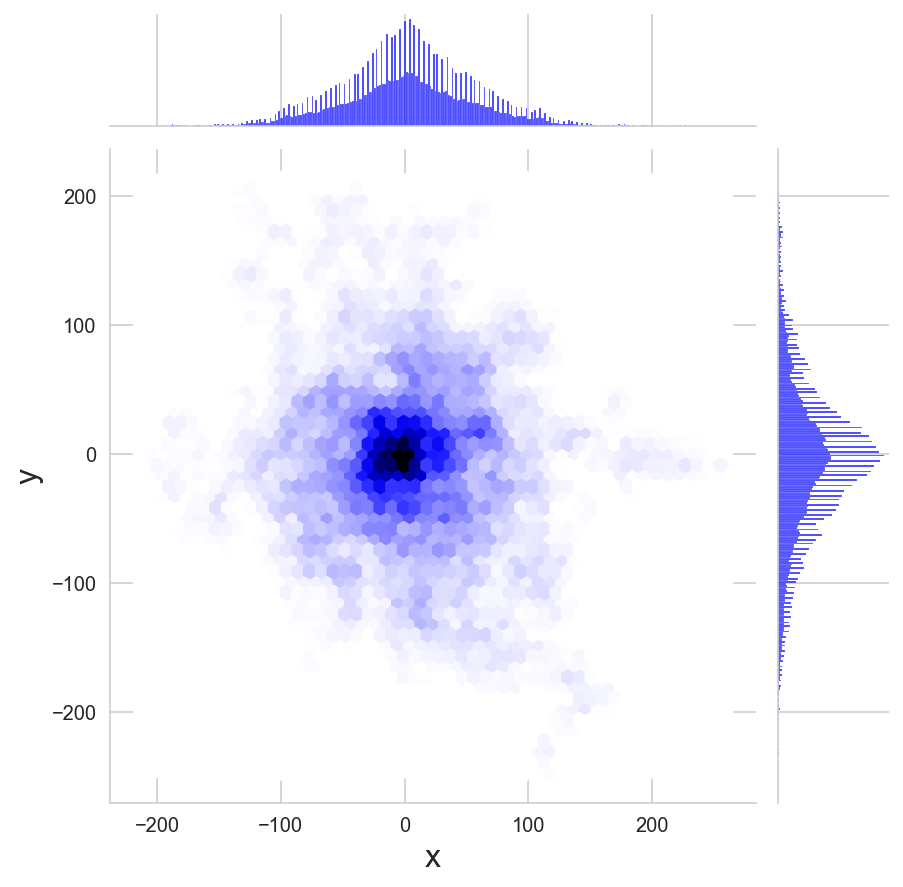

In [47]:
sns.jointplot(x=paths_2d_x, y=paths_2d_y, kind='hex', color='b', ).set_axis_labels('x', 'y', fontsize=16);

## Random walk in 3D

Starting at the origin, $(x=0, y=0, x=0)$, and taking random steps in $x$, $y$, or $z$ dimensions with step size of -1, 0, or 1. 
Resulting in 27 possiblilities for $(\Delta x, \Delta y, \Delta z)$.

In [48]:
# Define parameters for the walk
dims = 3
n = 10000
step_set = [-1, 0, 1]

In [49]:
# define size and number of steps 
step_shape = (n, dims)

# define origin at y = 0
origin = np.zeros((1, dims))
step_shape, origin

((10000, 3), array([[0., 0., 0.]]))

In [50]:
# Simulate steps in 1D with either -1, 0, or 1 step size 
np.random.seed(75647)
steps = np.random.choice(a=step_set, size=step_shape)
steps

array([[-1, -1, -1],
       [ 0,  1, -1],
       [ 1,  1, -1],
       ...,
       [ 0, -1,  1],
       [ 1,  1,  0],
       [-1,  0, -1]])

In [51]:
# calculate cumulative steps from origin (along the 0th axis)
path = np.concatenate([origin, steps]).cumsum(0)
path

array([[  0.,   0.,   0.],
       [ -1.,  -1.,  -1.],
       [ -1.,   0.,  -2.],
       ...,
       [  5., -34.,  -8.],
       [  6., -33.,  -8.],
       [  5., -33.,  -9.]])

In [52]:
# define the first and last steps 
start = path[:1]
stop = path[-1:]
start, stop

(array([[0., 0., 0.]]), array([[  5., -33.,  -9.]]))

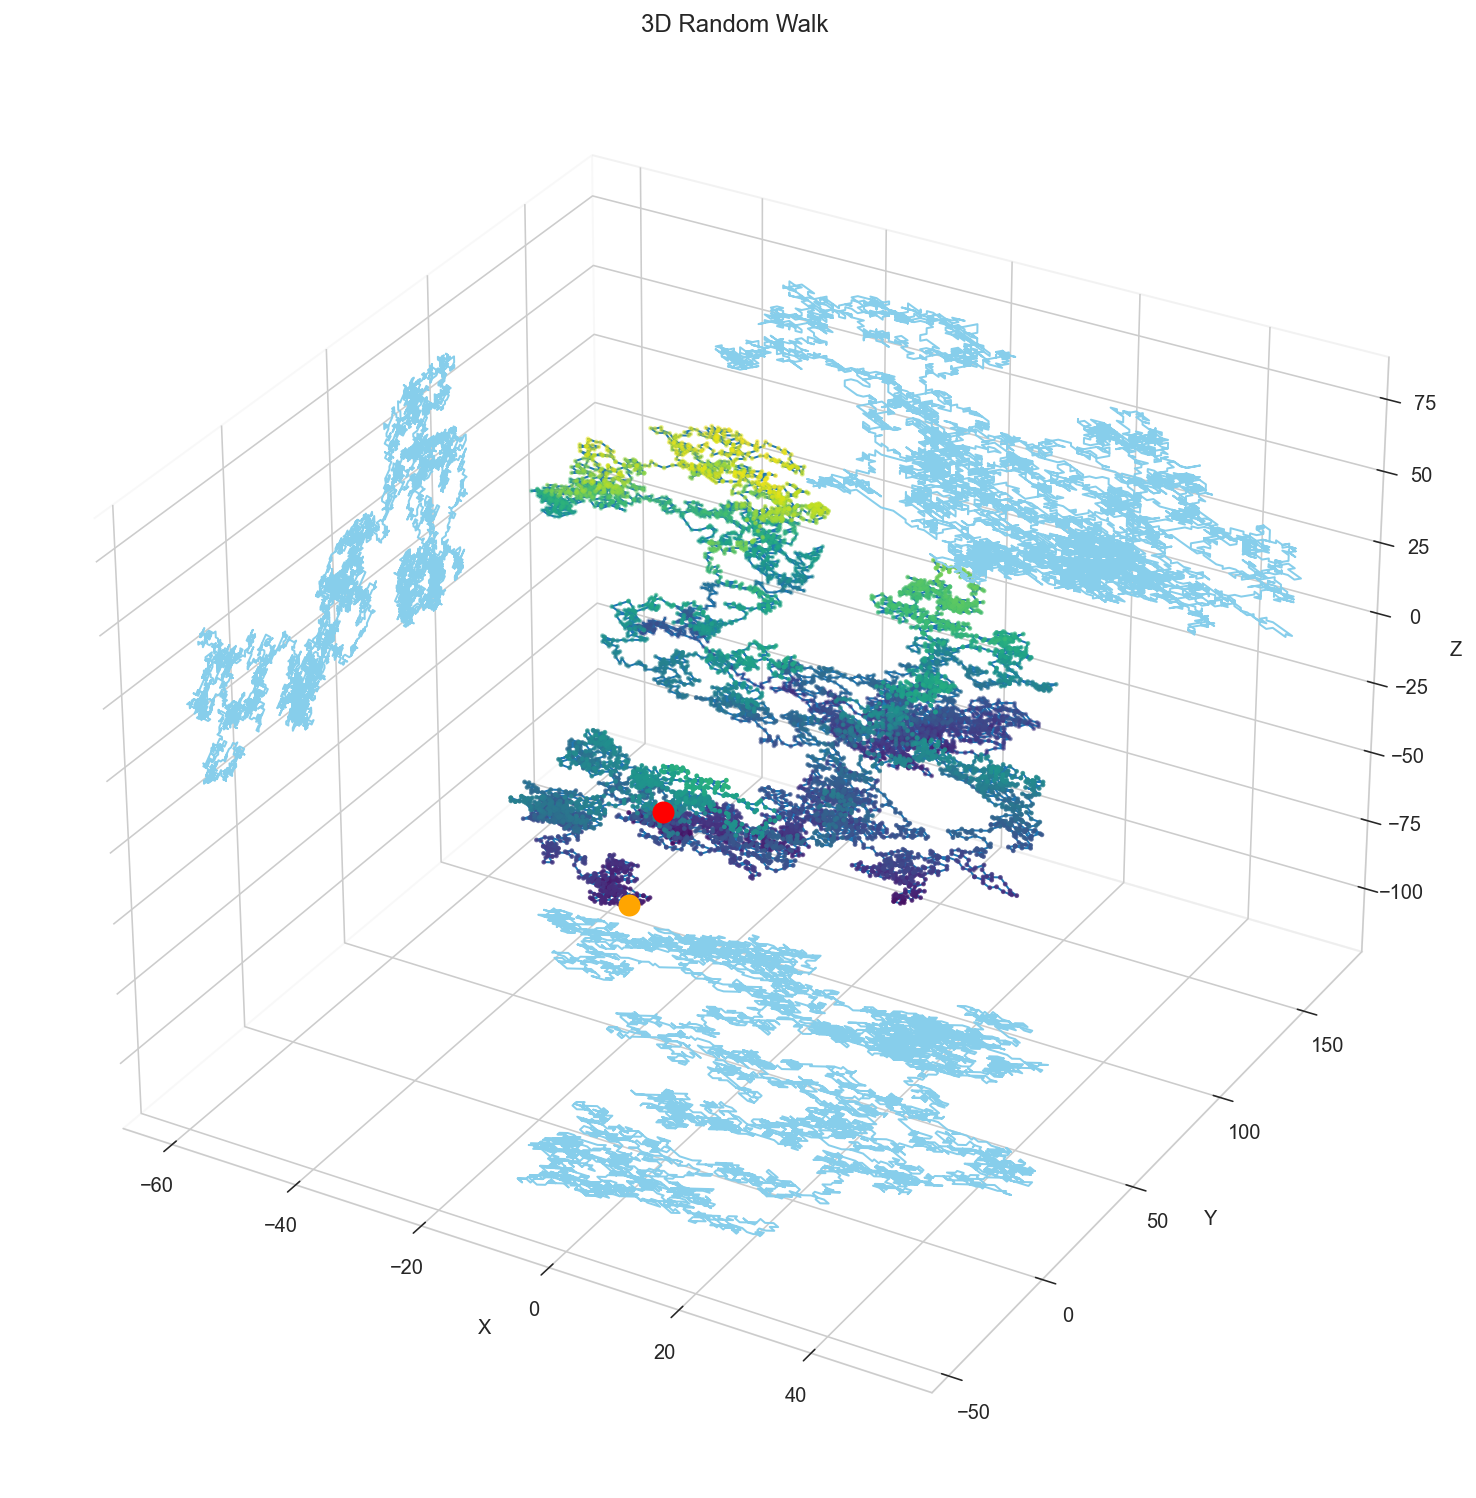

In [53]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.grid(True)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot3D(path[:,0], path[:,2], 'skyblue', zdir='y', zs=170, lw=1)
ax.plot3D(path[:,1], path[:,2], 'skyblue', zdir='x', zs=-60, lw=1)
ax.plot3D(path[:,0], path[:,1], 'skyblue', zdir='z', zs=-110, lw=1)
ax.plot3D(start[:,0], start[:,1], start[:,2], 
          color = 'r', marker='o', ms=10)
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
          color = 'orange', marker='o', ms=10)
ax.plot3D(path[:,0], path[:,1], path[:,2], lw=1, zorder=1)
ax.scatter3D(path[:,0], path[:,1], path[:,2], c=path[:,2], cmap='viridis', s=2, zorder=5)

plt.title('3D Random Walk');

### Multiple moving particles in 3D

In [54]:
num_paths = np.arange(1, 1000)

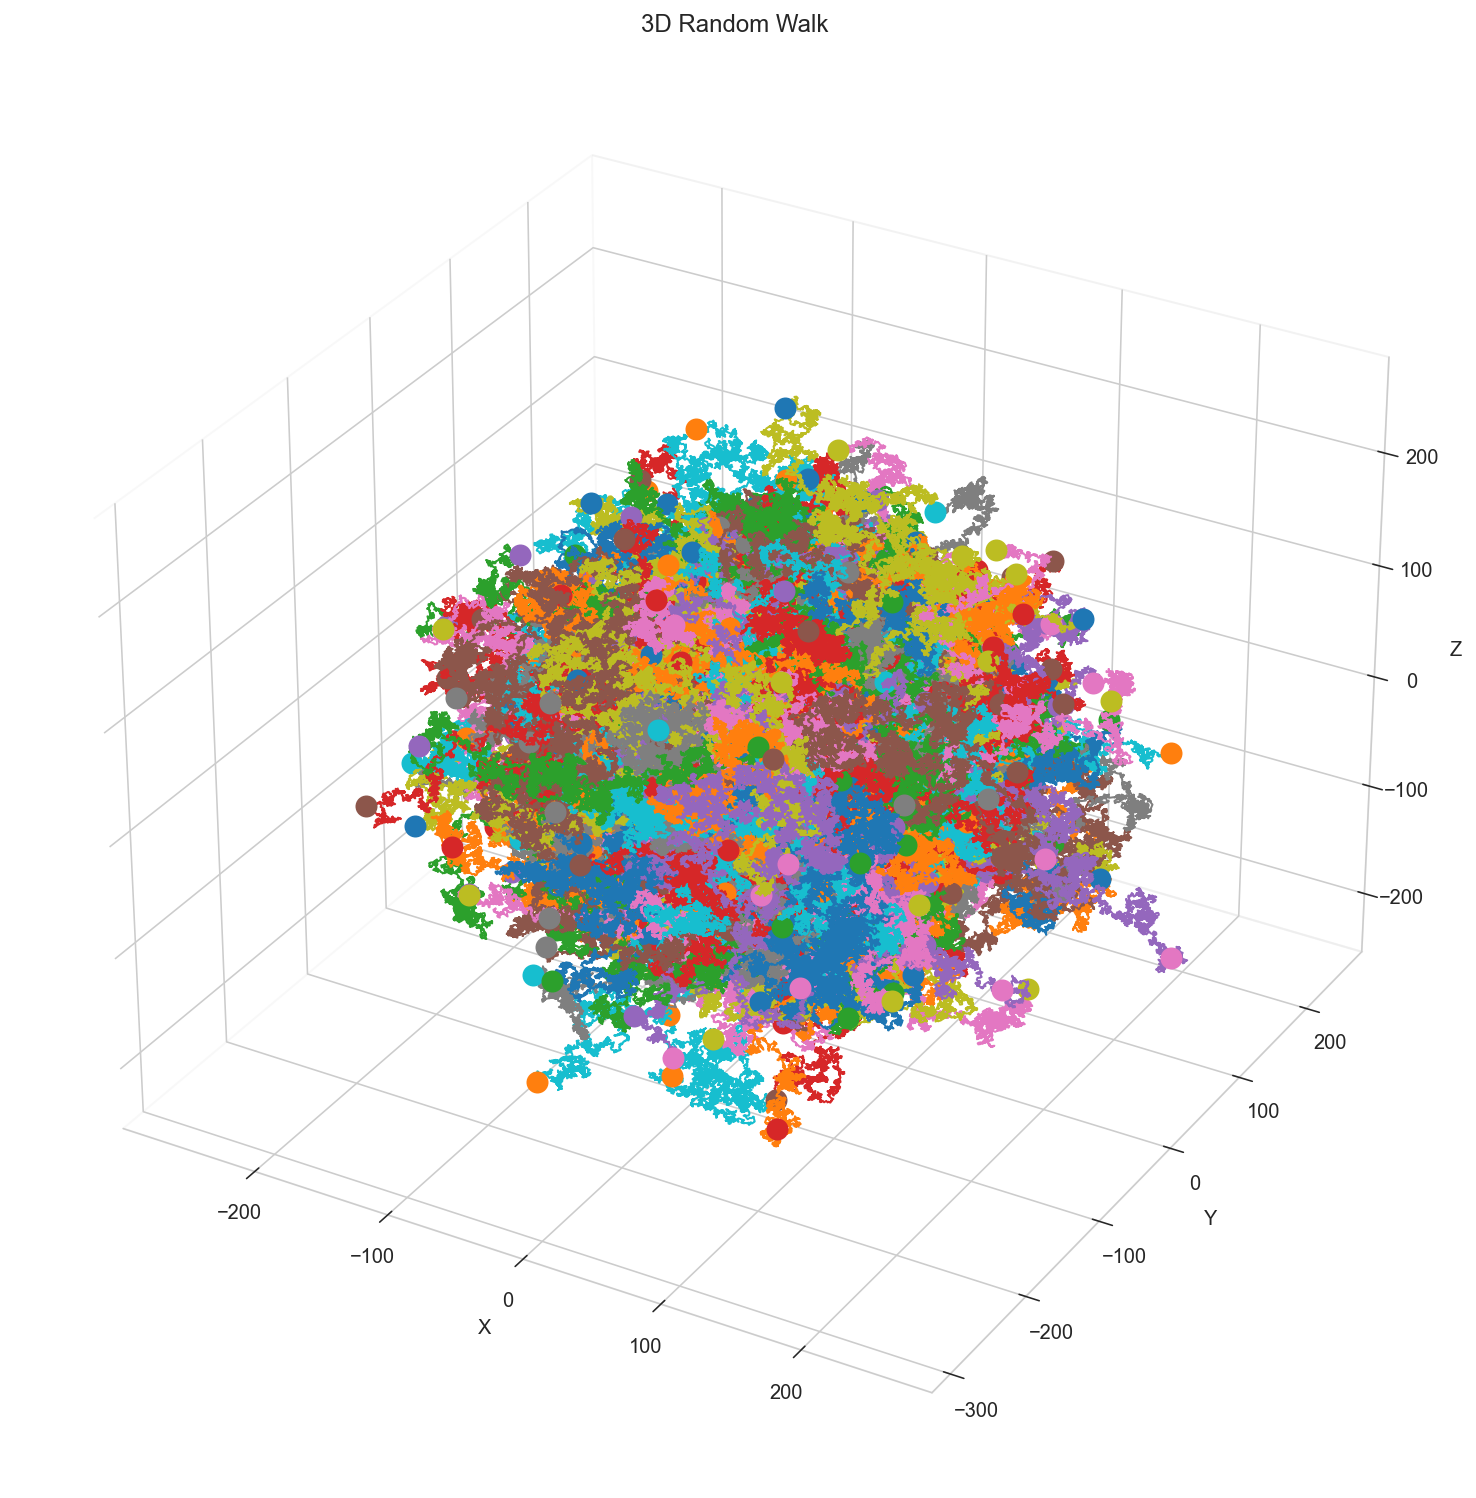

In [55]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.grid(True)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Random Walk');

for i in num_paths:

  # Simulate steps in 3D   
    origin = np.random.randint(low=-10,high=10,size=(1,dims))
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:] 

  # plot trajectories
    ax.plot3D(path[:,0], path[:,1], path[:,2], 
              lw=1)
    ax.plot3D(start[:,0], start[:,1], start[:,2], 
              marker='o', ms=10)
    ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
              marker='o', ms=10, )